In [1]:
import requests
url = "https://raw.githubusercontent.com/edoardoCame/PythonMiniTutorials/cf69ad87455d44e753ccecdf0f3932f83beb8288/Data%20Processing/csvReaderScript.py"

exec(requests.get(url).text)

<Axes: xlabel='timestamp'>

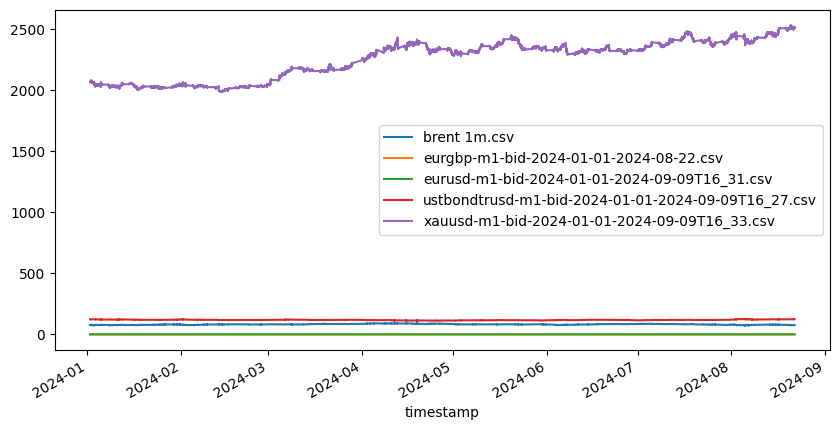

In [2]:
path = r"C:\Users\camere\Conda_3.11_enviroment\CSV DATA\1min data"
myData = ReadCSVfiles(files_path=path, wannaprint=False)
#myData = myData.pct_change(60).dropna()
myData.plot(figsize=(10, 5))    


### Try multiple linear regression in cupy

In [3]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Create the arrays
features = cp.array(myData.iloc[:, 1:])
print(f"Features array shape: {features.shape}")
target = cp.array(myData.iloc[:, 0])
print(f"Target array shape: {target.shape}")

Features array shape: (108586, 4)
Target array shape: (108586,)


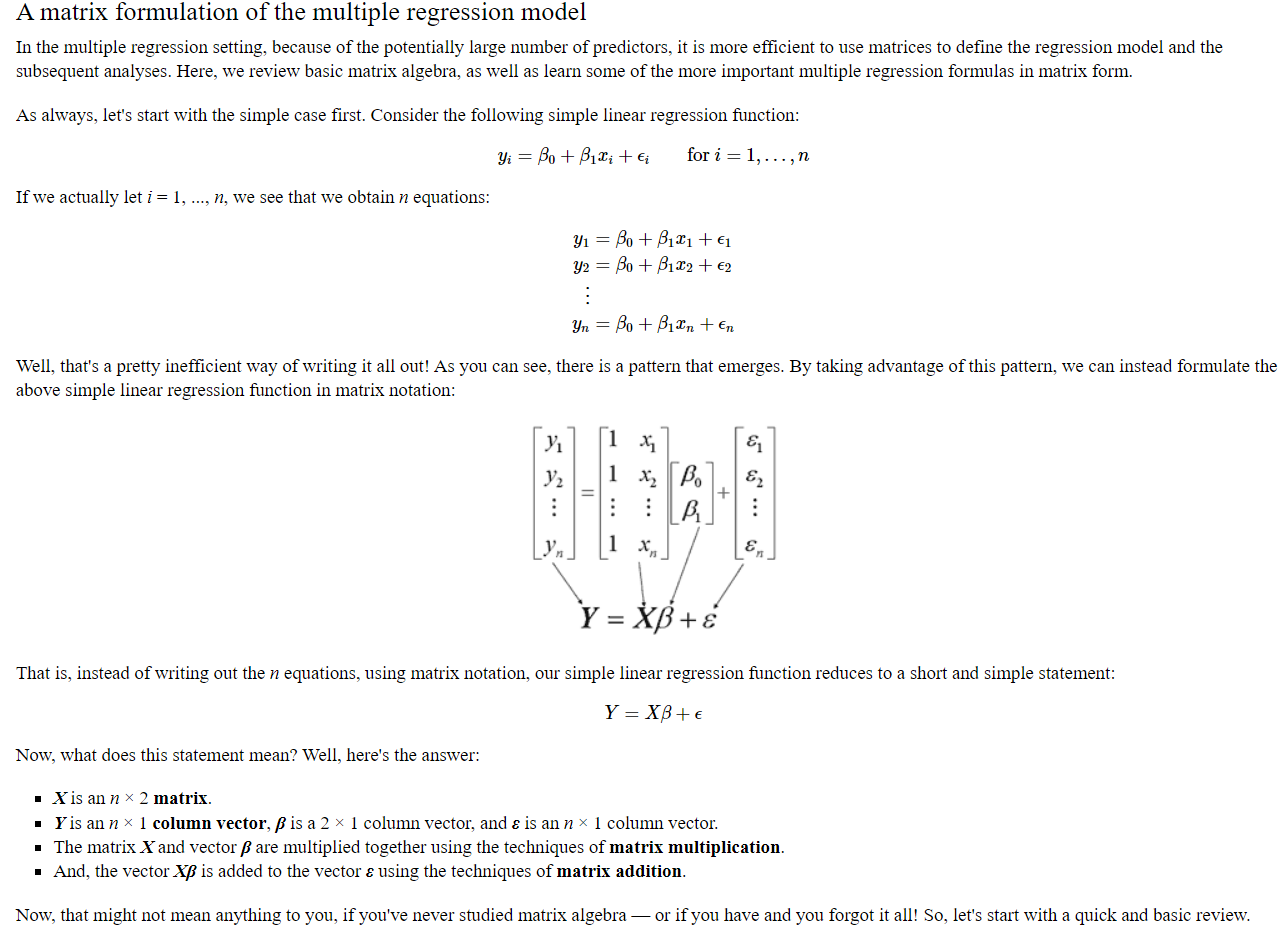

In [7]:
print(features)

[[1.000000e+00 8.673900e-01 1.103770e+00 1.241160e+02 2.064968e+03]
 [1.000000e+00 8.673200e-01 1.103840e+00 1.241120e+02 2.065558e+03]
 [1.000000e+00 8.673900e-01 1.103880e+00 1.240540e+02 2.066105e+03]
 ...
 [1.000000e+00 8.518300e-01 1.115100e+00 1.249280e+02 2.511428e+03]
 [1.000000e+00 8.517700e-01 1.115030e+00 1.249570e+02 2.511508e+03]
 [1.000000e+00 8.517300e-01 1.115110e+00 1.249250e+02 2.512048e+03]]


In [6]:
# Add a column of ones to X to account for the intercept
features = cp.hstack([cp.ones((features.shape[0], 1)), features])

# Perform the linear least squares regression
coefficients, residuals, rank, s = cp.linalg.lstsq(features, target, rcond=None)

# Calculate the predicted values
predictions = cp.dot(features, coefficients)

# Calculate the total sum of squares (SS_tot)
SS_tot = cp.sum((target - cp.mean(target)) ** 2)

# Calculate the residual sum of squares (SS_res)
SS_res = cp.sum((target - predictions) ** 2)

# Calculate the R-squared value
R_squared = 1 - (SS_res / SS_tot)

# Print the coefficients and R-squared value
print("Coefficients:", coefficients)
print("R-squared:", R_squared)

Coefficients: [ 2.37857895e+02 -6.71764348e-01 -7.03080599e+01 -7.31990865e-01
  3.95277197e-03]
R-squared: 0.5543394114630387


### continue feature engineering

In [ ]:
forward_returns = myData.pct_change(-14)
past_returns = myData.pct_change()

merged_df = pd.merge(past_returns, forward_returns, on='timestamp', how='right')
myData['Gold/Sma14'] = myData['xauusd-m1-bid-2024-01-01-2024-09-09T16_33.csv'].rolling(14).mean() / myData['xauusd-m1-bid-2024-01-01-2024-09-09T16_33.csv']
myData['Gold/Sma30'] = myData['xauusd-m1-bid-2024-01-01-2024-09-09T16_33.csv'].rolling(30).mean() / myData['xauusd-m1-bid-2024-01-01-2024-09-09T16_33.csv']
myData['Gold/Sma60'] = myData['xauusd-m1-bid-2024-01-01-2024-09-09T16_33.csv'].rolling(60).mean() / myData['xauusd-m1-bid-2024-01-01-2024-09-09T16_33.csv']

In [ ]:
merged_df = pd.merge(merged_df, myData[['Gold/Sma14', 'Gold/Sma30', 'Gold/Sma60']], on='timestamp', how='right')
merged_df.dropna(inplace=True)

Next steps: convert everything into a numpy multidimensional array so that i can calculate quickly (with numba and prange) the various SMAs, and use the price/sma ratio as a feature. Then add other feature like rolling realized volatility, rolling returns (momentum)... And then create the model tree with pycaret.